In [0]:
#Import library
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [0]:
#Create vertices and edges
vertices = sqlContext.createDataFrame([
  ("r262", "reviewer"),
  ("r31021", "reviewer"),
  ("r1560", "reviewer"),
  ("r3549", "reviewer"),
  ("r2093", "reviewer"),
  ("p18696", "product"),
  ("p19871", "product"),
  ("p18559", "product"),
  ("p3924", "product"),
  ("p2868", "product"),
  ("p5648", "product"),
  ("p10424", "product"),
  ("p29006", "product"),
  ("p20584", "product"),
  ("p1649", "product"),
  ("p9678", "product"),
  ("p13454", "product"),
  ("p5606", "product"),
  ("p10819", "product"),
  ("p19846", "product"),
  ("p22966", "product"),
  ("p16623", "product"),
  ("p4687", "product"),
  ("p7041", "product"),
  ("p9526", "product"),
  ("p9304", "product"),
  ("p14642", "product"),
  ("p17644", "product"),
  ("p5021", "product"),
  ("p32367", "product"),
  ("p21189", "product"),
  ("p3752", "product"),
  ("p7043", "product"),
  ("p17545", "product"),
  ("p3094", "product")
], ["id", "type"])

edges = sqlContext.createDataFrame([
  ("p18696", "r262", "recommended to"),
  ("p19871", "r262", "recommended to"),
  ("p18559", "r262", "recommended to"),
  ("p3924", "r262", "recommended to"),
  ("p2868", "r262", "recommended to"),
  ("p5648", "r262", "recommended to"),
  ("p10424", "r262", "recommended to"),
  ("p29006", "r262", "recommended to"),
  ("p20584", "r262", "recommended to"),
  ("p1649", "r262", "recommended to"),
  ("p18696", "r31021", "recommended to"),
  ("p18559", "r31021", "recommended to"),
  ("p2868", "r31021", "recommended to"),
  ("p9678", "r31021", "recommended to"),
  ("p3924", "r31021", "recommended to"),
  ("p13454", "r31021", "recommended to"),
  ("p5606", "r31021", "recommended to"),
  ("p10819", "r31021", "recommended to"),
  ("p19846", "r31021", "recommended to"),
  ("p22966", "r31021", "recommended to"),
  ("p5606", "r1560", "recommended to"),
  ("p10819", "r1560", "recommended to"),
  ("p5648", "r1560", "recommended to"),
  ("p19871", "r1560", "recommended to"),
  ("p18696", "r1560", "recommended to"),
  ("p22966", "r1560", "recommended to"),
  ("p2868", "r1560", "recommended to"),
  ("p16623", "r1560", "recommended to"),
  ("p13454", "r1560", "recommended to"),
  ("p3924", "r1560", "recommended to"),
  ("p18696", "r3549", "recommended to"),
  ("p19871", "r3549", "recommended to"),
  ("p20584", "r3549", "recommended to"),
  ("p18559", "r3549", "recommended to"),
  ("p4687", "r3549", "recommended to"),
  ("p3924", "r3549", "recommended to"),
  ("p7041", "r3549", "recommended to"),
  ("p19846", "r3549", "recommended to"),
  ("p9526", "r3549", "recommended to"),
  ("p2868", "r3549", "recommended to"),
  ("p9304", "r2093", "recommended to"),
  ("p14642", "r2093", "recommended to"),
  ("p17644", "r2093", "recommended to"),
  ("p5021", "r2093", "recommended to"),
  ("p32367", "r2093", "recommended to"),
  ("p21189", "r2093", "recommended to"),
  ("p3752", "r2093", "recommended to"),
  ("p7043", "r2093", "recommended to"),
  ("p17545", "r2093", "recommended to"),
  ("p3094", "r2093", "recommended to")
], ["src", "dst", "relationship"])

In [0]:
#Plot graph
!pip install networkx
import networkx as nx

def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(111)
    nx.draw(Gplot, with_labels=True, font_weight='bold')

Collecting networkx
 Downloading networkx-2.5-py3-none-any.whl (1.6 MB)
▏ | 10 kB 26.0 MB/s eta 0:00:01 |▍ | 20 kB 22.4 MB/s eta 0:00:01 |▋ | 30 kB 18.0 MB/s eta 0:00:01 |▉ | 40 kB 12.3 MB/s eta 0:00:01 |█ | 51 kB 9.1 MB/s eta 0:00:01 |█▏ | 61 kB 7.4 MB/s eta 0:00:01 |█▍ | 71 kB 7.8 MB/s eta 0:00:01 |█▋ | 81 kB 8.2 MB/s eta 0:00:01 |█▉ | 92 kB 7.8 MB/s eta 0:00:01 |██ | 102 kB 6.9 MB/s eta 0:00:01 |██▎ | 112 kB 6.9 MB/s eta 0:00:01 |██▍ | 122 kB 6.9 MB/s eta 0:00:01 |██▋ | 133 kB 6.9 MB/s eta 0:00:01 |██▉ | 143 kB 6.9 MB/s eta 0:00:01 |███ | 153 kB 6.9 MB/s eta 0:00:01 |███▎ | 163 kB 6.9 MB/s eta 0:00:01 |███▌ | 174 kB 6.9 MB/s eta 0:00:01 |███▋ | 184 kB 6.9 MB/s eta 0:00:01 |███▉ | 194 kB 6.9 MB/s eta 0:00:01 |████ | 204 kB 6.9 MB/s eta 0:00:01 |████▎ | 215 kB 6.9 MB/s eta 0:00:01 |████▌ | 225 kB 6.9 MB/s eta 0:00:01 |████▋ | 235 kB 6.9 MB/s eta 0:00:01 |████▉ | 245 kB 6.9 MB/s eta 0:00:01 |█████ | 256 kB 6.9 MB/s eta 0:00:01 |█████▎ | 266 kB 6.9 MB/s eta 0:00:01 |█████▌ | 276 kB 6.9 MB/s eta 0:00:01 |█████▊ | 286 kB 6.9 MB/s eta 0:00:01 |█████▉ | 296 kB 6.9 MB/s eta 0:00:01 |██████ | 307 kB 6.9 MB/s eta 0:00:01 |██████▎ | 317 kB 6.9 MB/s eta 0:00:01 |██████▌ | 327 kB 6.9 MB/s eta 0:00:01 |██████▊ | 337 kB 6.9 MB/s eta 0:00:01 |███████ | 348 kB 6.9 MB/s eta 0:00:01 |███████ | 358 kB 6.9 MB/s eta 0:00:01 |███████▎ | 368 kB 6.9 MB/s eta 0:00:01 |███████▌ | 378 kB 6.9 MB/s eta 0:00:01 |███████▊ | 389 kB 6.9 MB/s eta 0:00:01 |████████ | 399 kB 6.9 MB/s eta 0:00:01 |████████▏ | 409 kB 6.9 MB/s eta 0:00:01 |████████▎ | 419 kB 6.9 MB/s eta 0:00:01 |████████▌ | 430 kB 6.9 MB/s eta 0:00:01 |████████▊ | 440 kB 6.9 MB/s eta 0:00:01 |█████████ | 450 kB 6.9 MB/s eta 0:00:01 |█████████▏ | 460 kB 6.9 MB/s eta 0:00:01 |█████████▎ | 471 kB 6.9 MB/s eta 0:00:01 |█████████▌ | 481 kB 6.9 MB/s eta 0:00:01 |█████████▊ | 491 kB 6.9 MB/s eta 0:00:01 |██████████ | 501 kB 6.9 MB/s eta 0:00:01 |██████████▏ | 512 kB 6.9 MB/s eta 0:00:01 |██████████▍ | 522 kB 6.9 MB/s eta 0:00:01 |██████████▌ | 532 kB 6.9 MB/s eta 0:00:01 |██████████▊ | 542 kB 6.9 MB/s eta 0:00:01 |███████████ | 552 kB 6.9 MB/s eta 0:00:01 |███████████▏ | 563 kB 6.9 MB/s eta 0:00:01 |███████████▍ | 573 kB 6.9 MB/s eta 0:00:01 |███████████▋ | 583 kB 6.9 MB/s eta 0:00:01 |███████████▊ | 593 kB 6.9 MB/s eta 0:00:01 |████████████ | 604 kB 6.9 MB/s eta 0:00:01 |████████████▏ | 614 kB 6.9 MB/s eta 0:00:01 |████████████▍ | 624 kB 6.9 MB/s eta 0:00:01 |████████████▋ | 634 kB 6.9 MB/s eta 0:00:01 |████████████▉ | 645 kB 6.9 MB/s eta 0:00:01 |█████████████ | 655 kB 6.9 MB/s eta 0:00:01 |█████████████▏ | 665 kB 6.9 MB/s eta 0:00:01 |█████████████▍ | 675 kB 6.9 MB/s eta 0:00:01 |█████████████▋ | 686 kB 6.9 MB/s eta 0:00:01 |█████████████▉ | 696 kB 6.9 MB/s eta 0:00:01 |██████████████ | 706 kB 6.9 MB/s eta 0:00:01 |██████████████▏ | 716 kB 6.9 MB/s eta 0:00:01 |██████████████▍ | 727 kB 6.9 MB/s eta 0:00:01 |██████████████▋ | 737 kB 6.9 MB/s eta 0:00:01 |██████████████▉ | 747 kB 6.9 MB/s eta 0:00:01 |███████████████ | 757 kB 6.9 MB/s eta 0:00:01 |███████████████▏ | 768 kB 6.9 MB/s eta 0:00:01 |███████████████▍ | 778 kB 6.9 MB/s eta 0:00:01 |███████████████▋ | 788 kB 6.9 MB/s eta 0:00:01 |███████████████▉ | 798 kB 6.9 MB/s eta 0:00:01 |████████████████ | 808 kB 6.9 MB/s eta 0:00:01 |████████████████▎ | 819 kB 6.9 MB/s eta 0:00:01 |████████████████▍ | 829 kB 6.9 MB/s eta 0:00:01 |████████████████▋ | 839 kB 6.9 MB/s eta 0:00:01 |████████████████▉ | 849 kB 6.9 MB/s eta 0:00:01 |█████████████████ | 860 kB 6.9 MB/s eta 0:00:01 |█████████████████▎ | 870 kB 6.9 MB/s eta 0:00:01 |█████████████████▌ | 880 kB 6.9 MB/s eta 0:00:01 |█████████████████▋ | 890 kB 6.9 MB/s eta 0:00:01 |█████████████████▉ | 901 kB 6.9 MB/s eta 0:00:01 |██████████████████ | 911 kB 6.9 MB/s eta 0:00:01 |██████████████████▎ | 921 kB 6.9 MB/s eta 0:00:01 |██████████████████▌ | 931 kB 6.9 MB/s eta 0:00:01 |██████████████████▋ | 942 kB 6.9 MB/s eta 0

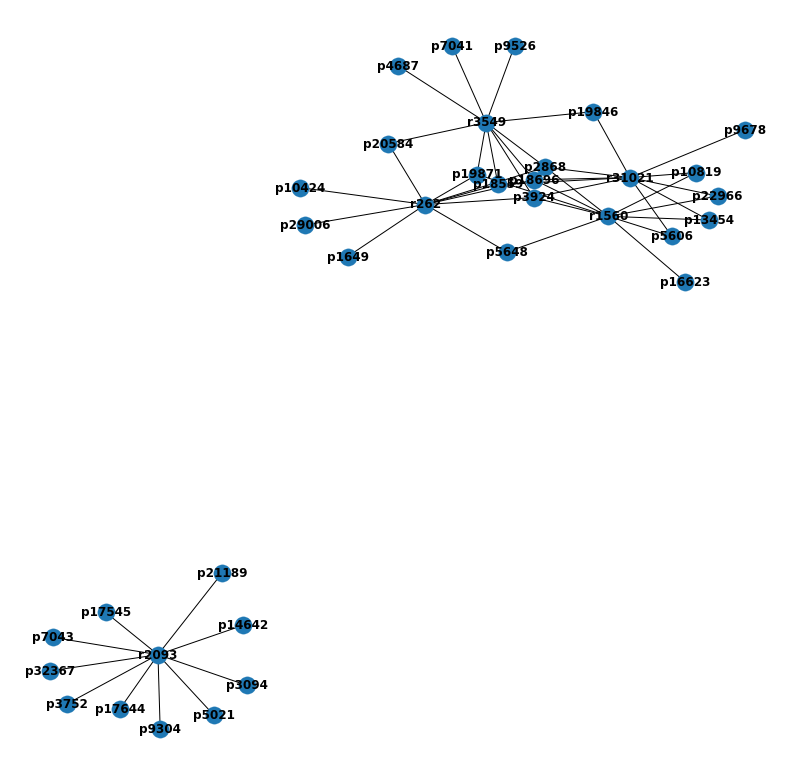

In [0]:
g = GraphFrame(vertices, edges)
PlotGraph(g.edges)
plt.savefig('testplot.png')